In [1]:
import os
from psaw import PushshiftAPI 
import pandas as pd
import time
import datetime
import re 
import matplotlib.pyplot as plt
import geopandas as gpd
import geopy
from matplotlib.colors import Normalize
from matplotlib import cm

In [ ]:
# import data

In [2]:
address = str(os.getcwd()) + '/data/'

hardwareswapraw = pd.read_csv (r'' + address +'hardware_swap_data.csv')

/home/north45/Programs/Anaconda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (69) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/north45/Programs/Anaconda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (67,69,70) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# crate reduced data and convert epoch time to regular date format

In [3]:
hardwareswapred =  hardwareswawpraw[['title', 'selftext', 'created_utc']]
hardwareswapred['date'] = pd.to_datetime(hardwareswapred['created_utc'], unit='s')

/home/north45/Programs/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# extract location information (state)

In [4]:
hardwareswapred['State'] =  hardwareswapred['title'].str.extract('(\[USA\s*-\s*\w{2}\])', expand=True)


/home/north45/Programs/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
hardwareswapred['State'] =hardwareswapred['title'].str.extract('(-\s*\w{2})', expand=True)


/home/north45/Programs/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
hardwareswapred['State'] = hardwareswapred['State'].str.replace('-', '')


/home/north45/Programs/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# extract information about what is offered in postings

In [7]:
hardwareswapred['sellItem'] = hardwareswapred['title'].str.extract('(.*?)', expand=True)


/home/north45/Programs/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
hardwareswapred['sellItem'] = hardwareswapred['title'].str.extract('(H\s*\](.*?)\[)', expand=True)


/home/north45/Programs/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
hardwareswapred['sellItem'] = hardwareswapred['sellItem'].str.replace('H\]', '')


/home/north45/Programs/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
hardwareswapred['sellItem'] = hardwareswapred['sellItem'].str.replace('\[', '')


/home/north45/Programs/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# extract information about what is being asked in postings

In [11]:
hardwareswapred['getItem'] = hardwareswapred['title'].str.extract('(.*?)', expand=True)

/home/north45/Programs/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
hardwareswapred['getItem']  = hardwareswapred['title'].str.split('W\s*\]').str[-1]

/home/north45/Programs/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# drop na elements

In [13]:
hardwareswapSell = hardwareswapred[hardwareswapred['sellItem'].notna()]

hardwareswapSell = hardwareswapred[hardwareswapred['State'].notna()]

hardwareswapBuy =hardwareswapred[hardwareswapred['getItem'].notna()]

hardwareswapBuy = hardwareswapred[hardwareswapred['State'].notna()]


In [ ]:
# convert state abbreviations to a unified format

In [14]:
sell3080 = hardwareswapSell[hardwareswapSell['sellItem'].str.contains('3080',  na=False)]
sell3080['State'] = sell3080['State'].apply(lambda x: x.upper()).str.replace(' ', '')


/home/north45/Programs/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
buy3080 = hardwareswapSell[hardwareswapSell['getItem'].str.contains('3080',  na=False)]
buy3080['State'] = buy3080['State'].apply(lambda x: x.upper()).str.replace(' ', '')


/home/north45/Programs/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# count number of sell/buy postings in each state

In [16]:
stateSellCount = sell3080['State'].value_counts().to_frame()
stateSellCount.reset_index(inplace = True)
stateSellCount = stateSellCount.rename(columns = {'index' : 'state', 'State' : '3080sells'})

In [17]:
stateBuyCount = buy3080['State'].value_counts().to_frame()
stateBuyCount.reset_index(inplace = True)
stateBuyCount = stateBuyCount.rename(columns = {'index' : 'state', 'State' : '3080buy'})


In [ ]:
# convert abbreviation to a name of the state (in case we want to use the full name of a State) 

In [18]:
short_state_names = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

stateSellCount['State'] = stateSellCount['state'].map(short_state_names)
stateSellCount = stateSellCount[stateSellCount['State'].notna()]
stateBuyCount['State'] = stateBuyCount['state'].map(short_state_names)
stateBuyCount = stateBuyCount[stateBuyCount['State'].notna()]


In [ ]:
# import information about states shape and location  

In [19]:
states = gpd.read_file(address +'usa-states-census-2014.shp')

In [20]:
states.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
states = states.to_crs("EPSG:3395")

In [22]:
statesred = pd.DataFrame()
statesred['Name'] = states['NAME']
statesred['geometry'] = states['geometry']

In [ ]:
# create dictionary of name state : shape

In [23]:
polygonStatedict = statesred.set_index('Name').to_dict('dict')
polygonStatedict = polygonStatedict['geometry']
print(polygonStatedict)

{'California': <shapely.geometry.multipolygon.MultiPolygon object at 0x7f097c5cd390>, 'District of Columbia': <shapely.geometry.polygon.Polygon object at 0x7f097b8716a0>, 'Florida': <shapely.geometry.multipolygon.MultiPolygon object at 0x7f097c5ba940>, 'Georgia': <shapely.geometry.polygon.Polygon object at 0x7f099aa6fd30>, 'Idaho': <shapely.geometry.polygon.Polygon object at 0x7f097c5baef0>, 'Illinois': <shapely.geometry.polygon.Polygon object at 0x7f099aa6fa58>, 'Iowa': <shapely.geometry.polygon.Polygon object at 0x7f099aa6fa90>, 'Kentucky': <shapely.geometry.polygon.Polygon object at 0x7f097ce2b470>, 'Louisiana': <shapely.geometry.polygon.Polygon object at 0x7f097ce2bf60>, 'Maryland': <shapely.geometry.multipolygon.MultiPolygon object at 0x7f097b6daf28>, 'Michigan': <shapely.geometry.multipolygon.MultiPolygon object at 0x7f097cf8dda0>, 'Minnesota': <shapely.geometry.polygon.Polygon object at 0x7f097cf57ac8>, 'Missouri': <shapely.geometry.polygon.Polygon object at 0x7f097cf68b00>, 'Ne

In [ ]:
# map state shape to DataFrame of count buy/sell postings

In [24]:
stateSellCount['geometry'] = stateSellCount['State'].map(polygonStatedict)
stateSellCount = stateSellCount.dropna().reset_index()
del stateSellCount['index']

stateBuyCount['geometry'] = stateBuyCount['State'].map(polygonStatedict)
stateBuyCount = stateBuyCount.dropna().reset_index()
del stateBuyCount['index']

In [25]:
pd.set_option('display.max_rows', 200)

In [ ]:
# create geoDataFrame objects for buy/sell postings

In [26]:
geosellCount = gpd.GeoDataFrame(stateSellCount) 
geobuyCount = gpd.GeoDataFrame(stateBuyCount) 

In [27]:
geosellCount.crs = "EPSG:3395"
geobuyCount.crs = "EPSG:3395"


In [ ]:
# Plot supply postings

/home/north45/Programs/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  """


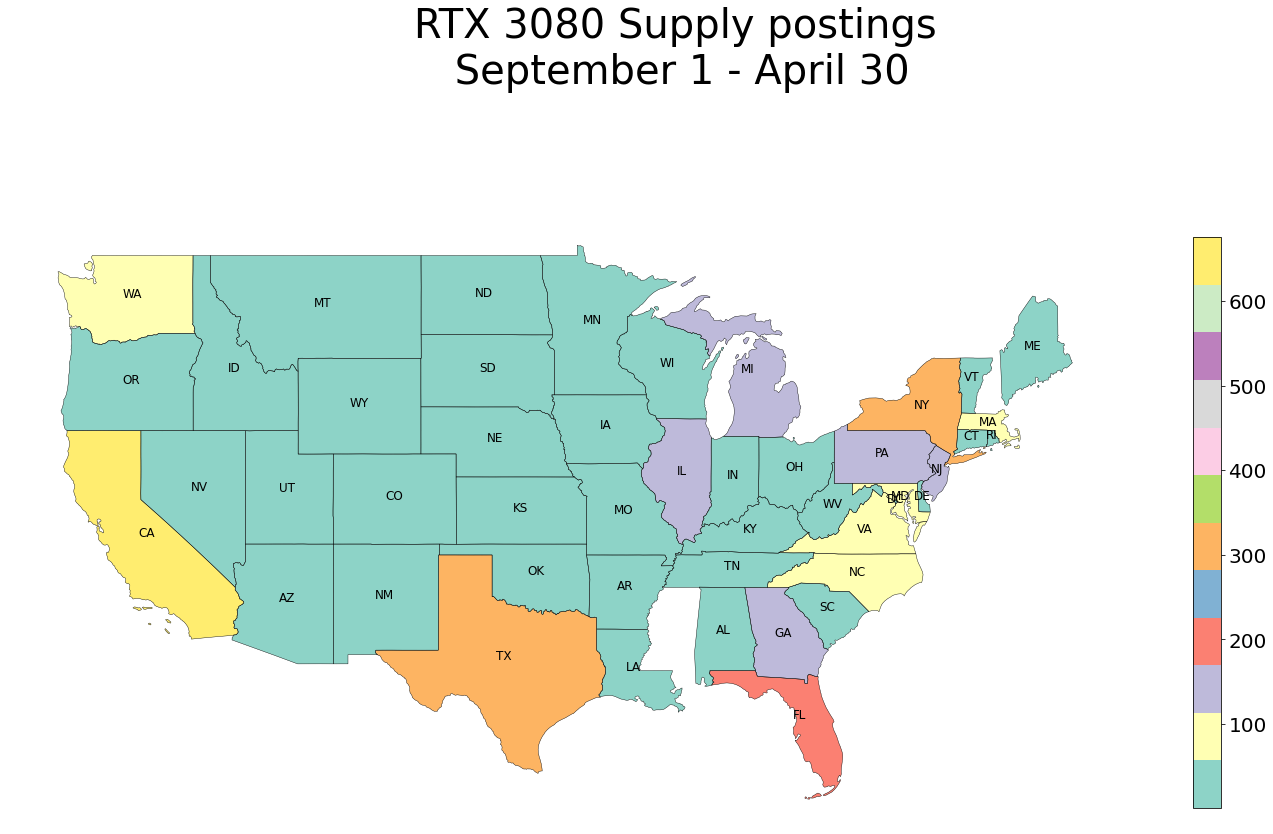

In [28]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()

geosellCount.apply(lambda x: ax.annotate(s=x['state'], xy=x['geometry'].centroid.coords[0], ha='center',
                                            fontsize=12),axis=1); 
geosellCount.boundary.plot(ax=ax, color='Black', linewidth=.4)

geosellCount.plot(ax = ax, column = '3080sells', cmap='Set3',
                            figsize=(25, 15), facecolor = 'blue')


norm = Normalize(vmin=geosellCount['3080sells'].min(), vmax=geosellCount['3080sells'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap="Set3")

cb = ax.get_figure().colorbar(n_cmap, ax = ax, orientation = 'vertical',
                         shrink = 0.7)
cb.ax.tick_params(labelsize=20)
fig.suptitle('RTX 3080 Supply postings \n September 1 - April 30 ', fontsize=40)
plt.axis('off')

fig.savefig('supplygeo3080.png')

In [ ]:
# plot demand postings

/home/north45/Programs/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  """


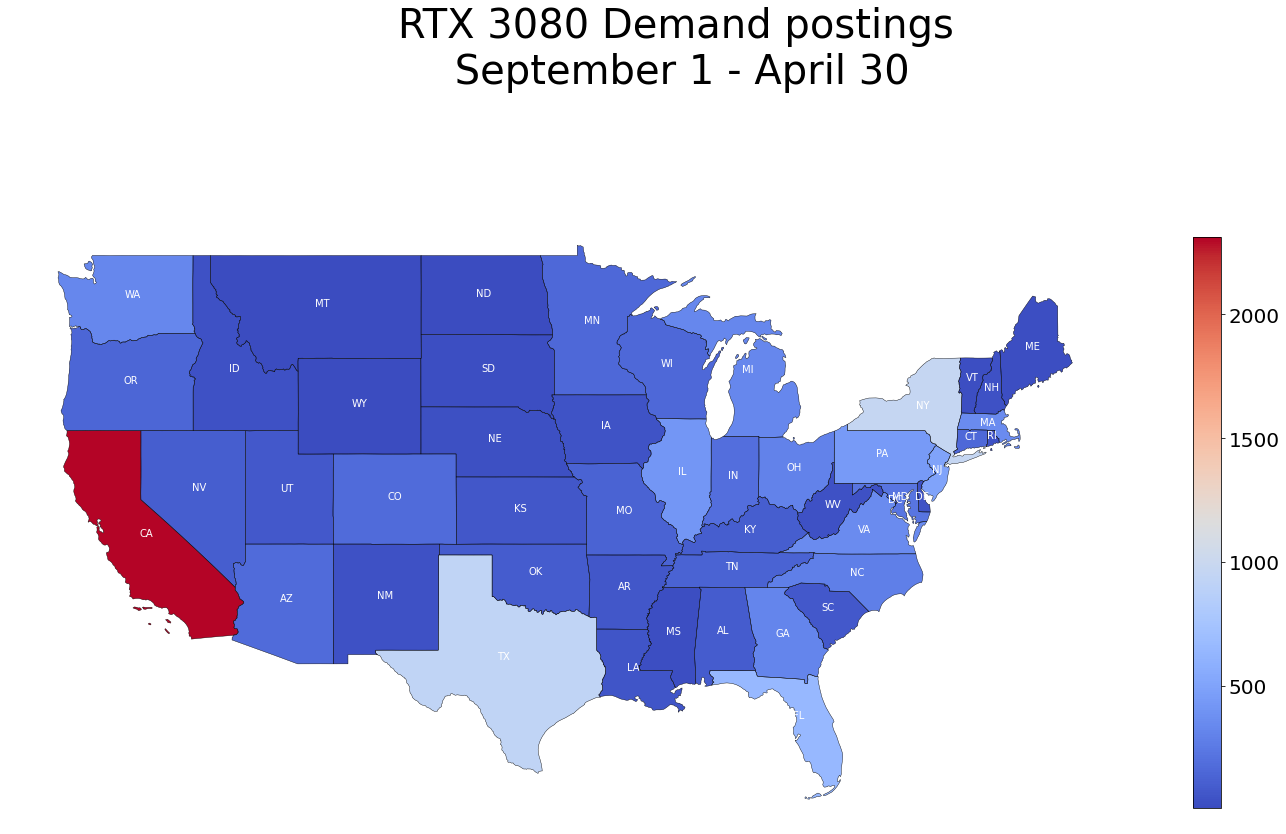

In [29]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()

geobuyCount.apply(lambda x: ax.annotate(s=x['state'], xy=x['geometry'].centroid.coords[0], ha='center',
                                            fontsize=10, color = 'white'),axis=1); 
geobuyCount.boundary.plot(ax=ax, color='Black', linewidth=.4)

geobuyCount.plot(ax = ax, column = '3080buy', cmap='coolwarm',
                            figsize=(25, 15), facecolor = 'blue')

norm = Normalize(vmin=geobuyCount['3080buy'].min(), vmax=geobuyCount['3080buy'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap="coolwarm")

cb = ax.get_figure().colorbar(n_cmap, ax = ax, orientation = 'vertical',
                         shrink = 0.7)
cb.ax.tick_params(labelsize=20)
fig.suptitle('RTX 3080 Demand postings \n September 1 - April 30 ', fontsize=40)
plt.axis('off')

fig.savefig('demandgeo3080.png')

In [30]:
# demand to supply DataFrame

In [31]:
statecountpostings = pd.merge( left = stateSellCount, right = stateBuyCount, how = 'left', 
                              left_on = 'State', right_on = 'State')

In [32]:
del statecountpostings['state_x'], statecountpostings['geometry_x'] 

In [ ]:
# create geoDataFrame object for  demand to supply ratio 

In [33]:
statecountpostings = statecountpostings.rename(columns = {'geometry_y' : 'geometry'})
geostateCount = gpd.GeoDataFrame(statecountpostings) 
geostateCount.crs = "EPSG:3395"
geostateCount['supplyToDemand'] = geostateCount['3080sells']/geostateCount['3080buy']

In [ ]:
# plot demand to supply ratio postings

/home/north45/Programs/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  """


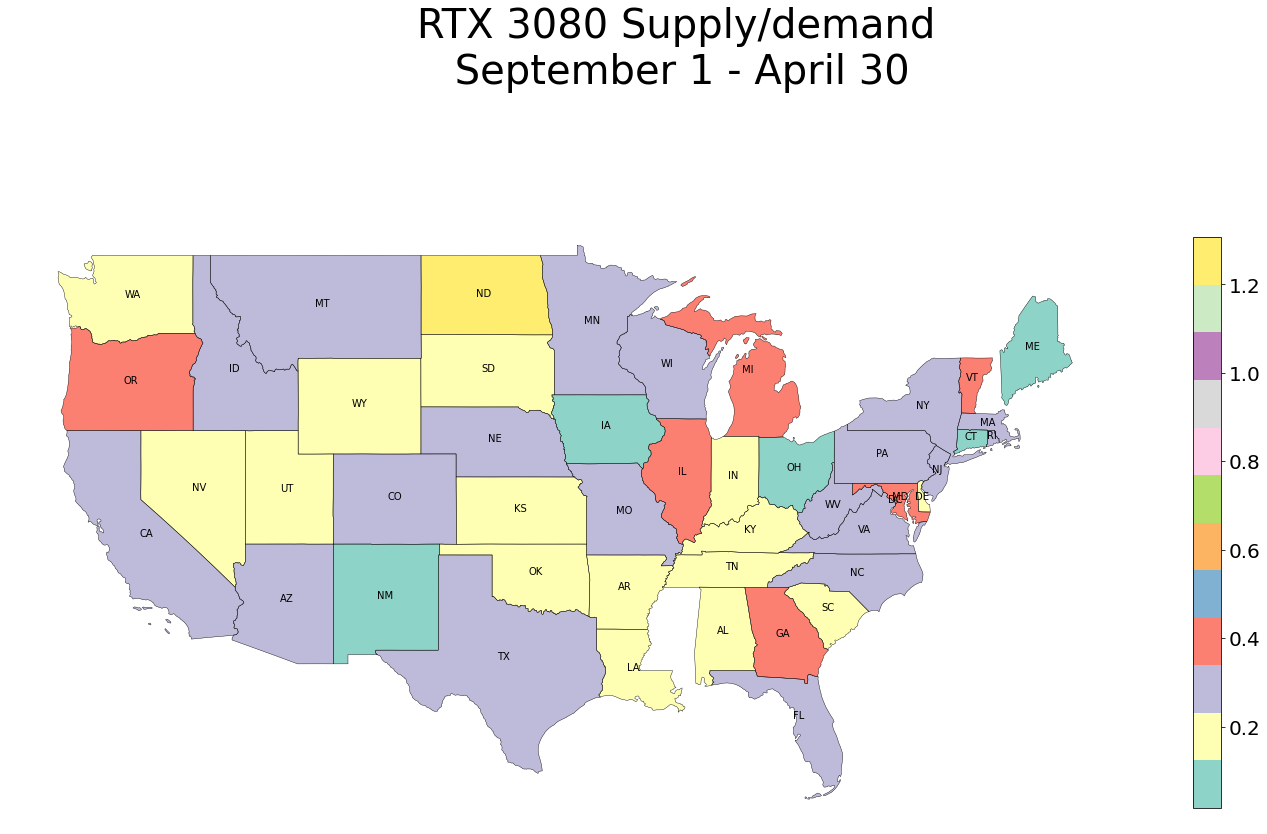

In [34]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()

geostateCount.apply(lambda x: ax.annotate(s=x['state_y'], xy=x['geometry'].centroid.coords[0], ha='center',
                                            fontsize=10),axis=1); 
geostateCount.boundary.plot(ax=ax, color='Black', linewidth=.4)

geostateCount.plot(ax = ax, column = 'supplyToDemand', cmap='Set3',
                            figsize=(25, 15), facecolor = 'blue')

norm = Normalize(vmin=geostateCount['supplyToDemand'].min(), vmax=geostateCount['supplyToDemand'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap="Set3")

cb = ax.get_figure().colorbar(n_cmap, ax = ax, orientation = 'vertical',
                         shrink = 0.7)
cb.ax.tick_params(labelsize=20)
fig.suptitle('RTX 3080 Supply/demand \n September 1 - April 30 ', fontsize=40)
plt.axis('off')
fig.savefig('supplyToDemand_geo3080.png')